<a href="https://colab.research.google.com/github/Masalskiy/analize_data/blob/main/1_3_auto_germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Объявления о продаже автомобилей в Германии<center>

Вам представлен датасет с объявлениями о продаже в Германии на 2022 год. Необходимо осмотреть первично данные и выполнить их предобработку, также сделать соответствующие выводы по полученной информации

### Обзор данных

* `mileage` — Пройденное расстояние на автомобиле
* `make` — Марка автомобиля
* `model` — Модель автомобиля
* `fuel` — Тип топлива
* `gear` — Тип коробки передач
* `offerType` — Тип предложения, то есть «Новые», «Демонстрационные» машины и т.д.
* `price` — Цена продажи автомобиля в объявлении (в долларах)
* `hp` — Количество лошадиных сил
* `year` — Год производства автомобиля

# Импортируйте необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd

### Загрузка данных

1. Загрузите необходимый датасет в переменную

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_id = '1wENaA2Z0t26_9pLedYcQqJyVNbH1_wIX'
url = 'https://drive.google.com/uc?id={}'.format(file_id)

In [ ]:
cars_df = pd.read_csv(url)

2. Проведите первичный осмотр данных при помощи известных вам методов(дополнительно можно использовать метод hist() для оценки распределений). Сделайте соответствующие выводы на основе полученной информации

In [ ]:
cars_df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011


array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'year'}>]],
      dtype=object)

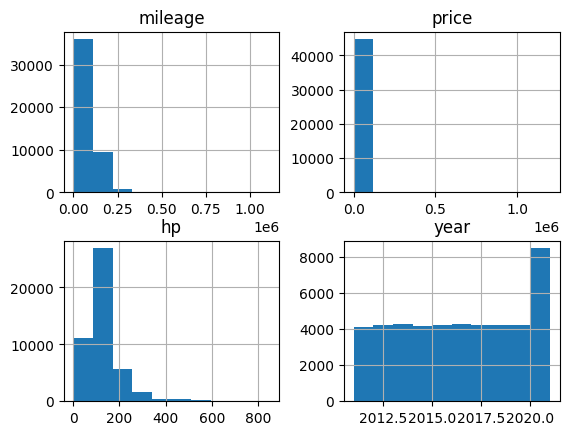

In [ ]:
cars_df.hist()

In [ ]:
cars_df.shape

(46405, 9)

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46158 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      44872 non-null  float64
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
cars_df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

3. Переименуйте столбец `offerType` под стандартное название

In [ ]:
cars_df.rename(columns={'offerType': 'offer_type'}, inplace=True)

### Работа с дубликатами данных

4. Необходимо вывести на экран количество дублированных строк в данных, если таковые имеются, а также избавиться от них. Не забудьте сбросить индекс в датафрейме при необходимости.

In [ ]:
cars_df.duplicated().sum()

2003

In [ ]:
cars_df[cars_df.duplicated()]

,mileage,make,model,fuel,gear,offer_type,price,hp,year
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980.0,69.0,2021
201,9,Toyota,Aygo,Gasoline,Manual,Pre-registered,11490.0,72.0,2021
202,9,Toyota,Aygo,Gasoline,Manual,Pre-registered,11490.0,72.0,2021
207,10,Toyota,Aygo,Gasoline,Manual,Pre-registered,11990.0,72.0,2021
208,10,Toyota,Aygo,Gasoline,Manual,Pre-registered,11990.0,72.0,2021
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021


In [ ]:
cars_df.drop_duplicates(inplace=True)

In [ ]:
cars_df.reset_index(drop=True, inplace=True)

### Работа с пропусками

5. Выведите на экран количество пропусков в каждом столбце, опишите их, почему они могут возникнуть и как их возможно исправить

In [ ]:
cars_df.isnull().sum()

mileage          0
make             0
model          137
fuel           247
gear           175
offer_type       0
price         1520
hp              24
year             0
dtype: int64

6. Заполните пропуски в `model`,`fuel`,`gear`

Заполнение пропусков для model

In [ ]:
cars_df[cars_df.model.isna()]

,mileage,make,model,fuel,gear,offer_type,price,hp,year
353,3500,Others,NaN,Electric,Manual,Used,5500.0,38.0,2018
1942,2900,Others,NaN,Electric,Automatic,Used,7900.0,5.0,2018
1950,60866,Opel,NaN,Gasoline,Manual,Used,12290.0,82.0,2019
1960,3550,Opel,NaN,Gasoline,Manual,Used,15800.0,110.0,2019
2413,3000,Audi,NaN,Electric,Automatic,Demonstration,172450.0,598.0,2021
...,...,...,...,...,...,...,...,...,...
43752,4020,Alpine,NaN,Gasoline,Automatic,Demonstration,75045.0,292.0,2021
44086,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,27440.0,141.0,2021
44130,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440.0,141.0,2021
44136,35,Kia,NaN,Electric,Automatic,Pre-registered,32440.0,204.0,2021


In [ ]:
cars_df.model.fillna('Unknown', inplace=True)

если make hp  fuel gear совпадает, то возможно это машины с одинаковыми марками

In [ ]:
cars_df.iloc[353]

mileage           3500
make            Others
model          Unknown
fuel          Electric
gear            Manual
offer_type        Used
price           5500.0
hp                38.0
year              2018
Name: 353, dtype: object

Заполнение пропусков для fuel

In [ ]:
cars_df[cars_df.fuel.isna()]

,mileage,make,model,fuel,gear,offer_type,price,hp,year
54,98100,SEAT,Leon,NaN,Manual,Used,9100.0,122.0,2013
101,57800,Mazda,2,NaN,Manual,Used,9250.0,90.0,2016
465,79100,Nissan,Micra,NaN,Manual,Used,6199.0,80.0,2015
903,37700,SEAT,Mii,NaN,Manual,Used,6900.0,60.0,2017
909,162274,Opel,Astra,NaN,Manual,Used,6980.0,110.0,2017
...,...,...,...,...,...,...,...,...,...
43794,2,Volkswagen,Touareg,NaN,Automatic,Pre-registered,96900.0,462.0,2021
43839,234,Fiat,Panda,NaN,Manual,Demonstration,11990.0,69.0,2021
43939,1001,Renault,Twingo,NaN,Manual,Demonstration,13380.0,65.0,2021
44211,50,Renault,Trafic,NaN,Automatic,Pre-registered,34990.0,145.0,2021


Не углубляясь с уверенностью можно сказать что машины до 2020 года в оснновном на бензине кроме toyota prius и tesla. Также в значении для электрокаров есть значение -/- (Fuel)

In [ ]:
np.unique(cars_df.make.values)

array(['9ff', 'Abarth', 'Aixam', 'Alfa', 'Alpina', 'Alpine', 'Aston',
       'Audi', 'BMW', 'Baic', 'Bentley', 'Brilliance', 'Cadillac',
       'Caravans-Wohnm', 'Chevrolet', 'Chrysler', 'Citroen', 'Corvette',
       'Cupra', 'DAF', 'DFSK', 'DS', 'Dacia', 'Daihatsu', 'Dodge',
       'Estrima', 'FISKER', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada',
       'Lamborghini', 'Lancia', 'Land', 'Lexus', 'Ligier', 'MINI',
       'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Microcar', 'Mitsubishi', 'Morgan', 'Nissan', 'Opel', 'Others',
       'Peugeot', 'Piaggio', 'Polestar', 'Porsche', 'RAM', 'Renault',
       'Rolls-Royce', 'SEAT', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki',
       'Tazzari', 'Tesla', 'Toyota', 'Trailer-Anhänger', 'Trucks-Lkw',
       'Volkswagen', 'Volvo', 'Zhidou', 'smart'], dtype=object)

In [ ]:
cars_df[cars_df.fuel.isna() & cars_df.make=='Toyota']

,mileage,make,model,fuel,gear,offer_type,price,hp,year


Вывод: для Tesla и Toyota пропусков нет

In [ ]:
type_fuel =  pd.Series(cars_df.fuel.values)

In [ ]:
pd.unique(type_fuel)

array(['Diesel', 'Gasoline', 'Electric/Gasoline', nan, '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

так как с уверенностью сказать какой тип топлива мы имеем, то можно создать новый тип Unknown или объеденить с '-/- (Fuel)'

In [ ]:
cars_df.fuel.fillna('-/- (Fuel)', inplace=True)

Пропуски для gear

In [ ]:
cars_df[cars_df.gear.isna()]

,mileage,make,model,fuel,gear,offer_type,price,hp,year
232,93850,Renault,Grand Scenic,Diesel,NaN,Used,7990.0,110.0,2012
335,52753,Lada,Vesta,Gasoline,NaN,Used,8000.0,106.0,2017
596,46850,Suzuki,Alto,Gasoline,NaN,Used,3999.0,68.0,2011
849,153500,Mitsubishi,ASX,Diesel,NaN,Used,10000.0,150.0,2014
1297,38000,Renault,ZOE,Electric,NaN,Used,8750.0,88.0,2016
...,...,...,...,...,...,...,...,...,...
42768,5000,Volvo,Unknown,Others,NaN,Used,2499.0,1.0,2020
43127,1490,Renault,Megane,Electric/Gasoline,NaN,Demonstration,21980.0,158.0,2020
43729,250,Fiat,New Panda,Gasoline,NaN,Demonstration,NaN,69.0,2021
44339,45,BMW,iX3,Electric,NaN,Used,58000.0,286.0,2021


In [ ]:
np.unique(cars_df.gear.values.astype('str'))

array(['Automatic', 'Manual', 'Semi-automatic', 'nan'], dtype='<U14')

In [ ]:
cars_df.gear.fillna('Unknown', inplace=True)

7. Удалите оставшиеся пропуски в столбцах `hp` и `price`.

In [ ]:
def add_cost(cars):
  cars_df = cars.copy()
  for index, row in cars_df.loc[cars_df.price.isnull()].iterrows():
    make = row.make
    model = row.model
    cars_df.at[index,'price']=cars_df.loc[(cars_df.make==make) & (cars_df.model==model)].price.mean()
  return cars_df

придумывать сами цены мы не имеем права, так как это может внести хаос в данные, то я бы не стал их ничем заменять.
Но если заполнять то можно взять среднее по одинаковым маркам авто

In [ ]:
#cars_df=add_cost(cars_df)
#cars_df.price.fillna(0, inplace=True)

лаконичный способ

In [ ]:
group_cars_df = cars_df.groupby(by='model', as_index=False).price.agg("median")

In [ ]:
for i in group_cars_df['model']:
  cars_df.loc[(cars_df.model==i) & (cars_df.price.isna()), 'price'] = group_cars_df[group_cars_df.model==i].price.values[0]

среднее по типу авто

In [ ]:
cars_df.loc[cars_df.hp.isnull()]

,mileage,make,model,fuel,gear,offer_type,price,hp,year
470,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222.0,NaN,2015
5353,129375,Peugeot,207,Gasoline,Manual,Used,5950.0,NaN,2013
8531,71113,Opel,Corsa,Gasoline,Manual,Used,5666.0,NaN,2012
8858,5,Aixam,Unknown,Electric,Automatic,Pre-registered,13812.5,NaN,2021
10103,72109,Ford,Fiesta,Gasoline,Manual,Used,6222.0,NaN,2013
11450,139,Renault,Twingo,Electric,Automatic,Demonstration,15990.0,NaN,2021
11932,46587,Opel,Corsa,-/- (Fuel),Manual,Used,7555.0,NaN,2015
12221,1500,Citroen,C3,Gasoline,Manual,Demonstration,15750.0,NaN,2020
16844,150,Others,Unknown,Electric,Automatic,Employee's car,4490.0,NaN,2020
23789,0,Fiat,500,Electric,Automatic,Demonstration,32990.0,NaN,2021


In [ ]:
def repair_hp(cars):
  cars_df = cars.copy()
  for index, row in cars_df.loc[cars_df.hp.isnull()].iterrows():
    make = row.make
    model = row.model
    standart = cars_df.loc[(cars_df.make==make) & (cars_df.model==model)].groupby(by=['hp']).hp.agg(['count'])
    popular_value=standart.index[standart['count']==standart['count'].max()].tolist()
    if len(popular_value) > 0:
      cars_df.at[index, 'hp'] = popular_value[0]
    else:
      cars_df.at[index, 'hp'] = 0
  return cars_df

In [ ]:
cars_df=repair_hp(cars_df)

Проверьте, все ли пропуски точно удалились из датафрейма

In [ ]:
cars_df.isnull().sum()

mileage       0
make          0
model         0
fuel          0
gear          0
offer_type    0
price         2
hp            0
year          0
dtype: int64

8. Оцените количество уникальных марок автомобилей (производителей) с помощью метода unique() и выведите их количество числом (пожалуйста, не считайте вручную)

In [ ]:
np.unique(cars_df.make.values)

array(['9ff', 'Abarth', 'Aixam', 'Alfa', 'Alpina', 'Alpine', 'Aston',
       'Audi', 'BMW', 'Baic', 'Bentley', 'Brilliance', 'Cadillac',
       'Caravans-Wohnm', 'Chevrolet', 'Chrysler', 'Citroen', 'Corvette',
       'Cupra', 'DAF', 'DFSK', 'DS', 'Dacia', 'Daihatsu', 'Dodge',
       'Estrima', 'FISKER', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada',
       'Lamborghini', 'Lancia', 'Land', 'Lexus', 'Ligier', 'MINI',
       'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Microcar', 'Mitsubishi', 'Morgan', 'Nissan', 'Opel', 'Others',
       'Peugeot', 'Piaggio', 'Polestar', 'Porsche', 'RAM', 'Renault',
       'Rolls-Royce', 'SEAT', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki',
       'Tazzari', 'Tesla', 'Toyota', 'Trailer-Anhänger', 'Trucks-Lkw',
       'Volkswagen', 'Volvo', 'Zhidou', 'smart'], dtype=object)

In [ ]:
cars_df['make'].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Lada', 'Mitsubishi',
       'Others', 'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa',
       'Subaru', 'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Alpine',
       'Lancia', 'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari',
       'Caravans-Wohnm', 'Aixam', 'Piaggio', 'Zhidou', 'Morgan',
       'Maybach', 'Tazzari', 'Trucks-Lkw', 'RAM', 'Iveco', 'DAF',
       'Alpina', 'Polestar', 'Brilliance', 'FISKER', 'Cadillac',
       'Trailer-Anhänger', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'],
      dtype=object)

In [ ]:
cars_df['make'].nunique()

77

9. Выведите топ 20 марок автомобилей (производителей) по количеству объявлений с помощью метода value_counts()

In [ ]:
cars_df.make.value_counts().head(20)

Volkswagen       6725
Opel             4616
Ford             4290
Skoda            2755
Renault          2704
Audi             2559
BMW              2373
Mercedes-Benz    2281
SEAT             1834
Hyundai          1758
Fiat             1504
Peugeot          1182
Toyota           1149
Kia               968
smart             937
Citroen           924
Volvo             778
Nissan            730
Mazda             699
Dacia             666
Name: make, dtype: int64

### Группировка данных

10. Сгруппируйте данные по столбцу `make`, выведите для каждого производителя среднюю стоимость их автомобиля, а также среднее число лошадиных сил и отсортируйте по убыванию столбца `price`. Отобразите только топ 20 самых дорогих производителей. Напишите вывод, всё ли в порядке с полученными данными или Вас что-то смущает

In [ ]:
cars_df.groupby(by=['make'], as_index=False).agg(avg_price = ('price', 'mean'),
                                                 avg_horse = ('hp', 'mean')).sort_values(by = ['avg_price'], ascending = [False]).round(2).head(20)

,make,avg_price,avg_horse
46,Maybach,450479.33,543.00
27,Ferrari,324028.18,693.91
39,Lamborghini,305698.78,690.11
48,McLaren,207538.18,646.64
62,Rolls-Royce,194900.00,605.00
10,Bentley,182383.97,554.87
6,Aston,163442.96,536.20
17,Corvette,110160.00,687.00
59,Porsche,90140.47,412.38
26,FISKER,69900.00,408.00


In [ ]:
cars_df[cars_df.make=='Maybach']

11. Создайте новый столбец из `make` и `model` и выведите топ 10 самый дорогих и дешевых автомобилей с помощью средней стоимости

In [ ]:
cars_df['full_model']=cars_df['make']+' '+cars_df['model']

In [ ]:
cars_df.groupby(by=['full_model'], as_index=False).agg(avg_price = ('price', 'mean')).sort_values(by = ['avg_price'], ascending = [False]).head(10).round({'avg_price': 1})

In [ ]:
cars_df.groupby(by=['full_model'], as_index=False).agg(avg_price = ('price', 'mean')).sort_values(by = ['avg_price'], ascending = [False]).tail(10).round({'avg_price': 1})

# PRO

In [ ]:
cars_df.describe()

,mileage,price,hp,year
count,4.440200e+04,4.440200e+04,44402.000000,44402.000000
mean,7.221993e+04,1.654351e+04,133.536620,2015.936061
std,6.237677e+04,1.938444e+04,75.350673,3.121481
min,0.000000e+00,0.000000e+00,0.000000,2011.000000
25%,2.131350e+04,7.500000e+03,86.000000,2013.000000
50%,6.105050e+04,1.099000e+04,116.000000,2016.000000
75%,1.060000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


13. Выведите на экран все BMW с пробегом меньше 1000 миль и годом производства после 2020 включительно, то есть, новые автомобили. Какие выводы можно сделать?

In [ ]:
cars_df[(cars_df.make=='BMW')&(cars_df.mileage<1000)&(cars_df.year>=2020)]

,mileage,make,model,fuel,gear,offer_type,price,hp,year,full_model
1587,50,BMW,320,Gasoline,Automatic,Used,33950.000000,184.0,2020,BMW 320
5665,25,BMW,330,Electric/Gasoline,Automatic,Demonstration,54680.000000,292.0,2021,BMW 330
5670,25,BMW,X5,Electric/Gasoline,Automatic,Demonstration,89980.000000,394.0,2021,BMW X5
10239,41,BMW,118,Gasoline,Manual,Employee's car,24960.000000,136.0,2021,BMW 118
15032,10,BMW,X2,Gasoline,Automatic,Pre-registered,41450.000000,178.0,2021,BMW X2
18837,789,BMW,530,Gasoline,Automatic,Employee's car,51990.000000,252.0,2020,BMW 530
27614,500,BMW,X5,Diesel,Automatic,Demonstration,81995.000000,286.0,2021,BMW X5
29229,5,BMW,730,Diesel,Automatic,Demonstration,89995.000000,286.0,2021,BMW 730
29235,600,BMW,X5 M,Gasoline,Automatic,Demonstration,71636.692308,625.0,2021,BMW X5 M
31782,250,BMW,X1,Gasoline,Manual,Demonstration,29260.000000,136.0,2021,BMW X1


14. Напишите функцию, которая будет применена к столбцу `price` с помощью apply(). Она должна категоризировать машины по данному признаку на дорогие, средней ценовой категории и дешевые. (границы категорий подберите самостоятельно). Дополнительно выведите количество автомобилей в каждой новой категории.

In [ ]:
cars_df['class_auto']=cars_df.price.apply(lambda x: "expensive" if x>100000 else('middle' if 15000<=x<=100000 else 'cheap'))

In [ ]:
cars_df

,mileage,make,model,fuel,gear,offer_type,price,hp,year,full_model,class_auto
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011,BMW 316,cheap
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011,Volkswagen Golf,cheap
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011,SEAT Exeo,cheap
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011,Renault Megane,cheap
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011,Peugeot 308,cheap
...,...,...,...,...,...,...,...,...,...,...,...
44397,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340.0,72.0,2021,Citroen C1,cheap
44398,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490.0,71.0,2021,Fiat 500,cheap
44399,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805.0,69.0,2021,Fiat 500,cheap
44400,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805.0,69.0,2021,Fiat Panda,cheap


In [ ]:
cars_df.class_auto.value_counts()

cheap        29447
middle       14678
expensive      277
Name: class_auto, dtype: int64

12. Сделайте общий вывод о проделанной работе

Ознакомлена с датасетом
Заполнены пропуски.
* Для цен пропуски зполнялись с помощью усредненных значений по такойже марке/модели
* Для Мощности пропуски заполнены числами соответствующими для такойже марки/модели
Проведена аналитика

Статистика по всем объявлениям
* средний пробег 72000 км
* средний год авто 2015-2016
* средняя стоимость авто 16500 долларов

Был проведен анализ по машинам BMW. Интересовали признаки:
* пробег меньше 1000 миль
* год производства после 2020 включительно. <br>
выводы следущие:
* всего 12 объявлений
* с автоматической коробкой передач 9
* средня стоимость авто 58600 долларов
* 7 машин демонстрационные
* 7 машин на бензиновом топливе
* средний пробег 1661 км

Создан новый столбец с классом автомобиля по цене. Границы

* .>100000$ - дорогие (268 шт.)

* 15000-10000$ - средний (14115)

* .<10000$ - бюджетные (28476)

